Notespace:
-Ryan: We should discuss the BuildingType and the MSSubClass columns. They give us almost the same info. Need to figure out what to do as a team. **Keeping, but pay attention to them**

Names brainstorming for datasets.

Dummified - initial_dummied_data.csv

Smartified - initial_condensed_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('merge_data_update.csv', index_col=0)

In [3]:
tdata = data.copy()

In [4]:
tdata

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ClassPr_S,ClassSc_S,SchD_S,TxD_S,LndAc_S,ImpAc_S,OthAc_S,HSTtl_D,HSTtl_S,GLA
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY 1945 & OLDER,1.0,1.0,37300.0,0.0,111700.0,NaN,NaN,856.0
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,1.0,1.0,43500.0,0.0,130600.0,NaN,NaN,1049.0
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY 1945 & OLDER,1.0,1.0,41100.0,0.0,123200.0,NaN,NaN,1001.0
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,RESIDENTIAL,2-STORY 1945 & OLDER,1.0,1.0,31100.0,0.0,93300.0,NaN,4850.0,1039.0
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,RESIDENTIAL,2-STORY 1946 & NEWER,1.0,1.0,64300.0,0.0,192800.0,NaN,NaN,1665.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY 1945 & OLDER,1.0,1.0,34600.0,0.0,103900.0,4850.0,4850.0,952.0
2576,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,1.0,1.0,46300.0,0.0,138800.0,NaN,NaN,1733.0
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,RESIDENTIAL,DUPLEX - ALL STYLES AND AGES,1.0,1.0,45800.0,0.0,137400.0,NaN,NaN,2002.0
2578,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,RESIDENTIAL,2-STORY 1946 & NEWER,1.0,1.0,66300.0,0.0,198900.0,4850.0,4850.0,1842.0


In [5]:
tdata.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

## Drop Columns

In [6]:
# These columns will be dropped later by Gabby: 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'

drop_list = ['Street', 'Alley', 'Utilities', 'LandSlope','Condition2', 'MapRefNo', 'ZngCdPr', 'ZngOLPr', 'ZngOLSc', 
           'ClassSc_S', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'RoofMatl', 'ExterCond', 'BsmtFinSF1', 
           'BsmtFinSF2', 'BsmtFinType2', 'GarageQual', 'GarageCond', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'YrSold', 'SaleType', 'SaleCondition', 
             'HSTtl_D', 'HSTtl_S', 'GLA', 'MSZoning', 'HouseStyle', 'ClassPr_S', 'ImpAc_S', 'Exterior2nd', 'GarageYrBlt',
            'LotFrontage']

In [7]:
tdata = tdata.drop(drop_list, axis=1)

In [8]:
tdata.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MoSold',
       'GeoRefNo', 'Prop_Addr', 'SchD_S', 'TxD_S', 'LndAc_S', 'OthAc_S'],
      dtype='object')

# ====================
# RYAN'S CODE SECTION
# ====================

## For 'HeatingQC', combine the one 'Po' with 'Fa' and Dummify

In [9]:
# Check initial state
tdata['HeatingQC'].value_counts()

Ex    1293
TA     768
Gd     434
Fa      84
Po       1
Name: HeatingQC, dtype: int64

In [10]:
# Replace the one 'Po' with 'Fa'
tdata['HeatingQC'].replace('Po', 'Fa', inplace=True)

In [11]:
# Dummifying, dropping 'Ex' class' column.
HeatingQC_dums = pd.get_dummies(tdata['HeatingQC'], prefix='HeatingQC', prefix_sep='_').drop('HeatingQC_Ex',1)
tdata = pd.concat([tdata.drop('HeatingQC', 1), HeatingQC_dums], axis=1)

In [12]:
# Check it
tdata.iloc[:,-3:].value_counts()

HeatingQC_Fa  HeatingQC_Gd  HeatingQC_TA
0             0             0               1293
                            1                768
              1             0                434
1             0             0                 85
dtype: int64

## 'CentralAir': Making 'Y' == 0, and 'N' == 1, rename NoCentralAir

Changing the base case (yes) to be included in the intercept value.

In [13]:
# Initial State
tdata['CentralAir'].value_counts()

Y    2417
N     163
Name: CentralAir, dtype: int64

In [14]:
# Transforming the column, Y == 0 and N == 1
tdata['CentralAir'].replace('Y', 0, inplace=True)
tdata['CentralAir'].replace('N', 1, inplace=True)
tdata.rename(columns={'CentralAir':'NoCentralAir'}, inplace=True)

In [15]:
# Checking the transformation
tdata['NoCentralAir'].value_counts()

0    2417
1     163
Name: NoCentralAir, dtype: int64

## 'Electrical' - Fill NaN, Dummify

If initial thought is correct, age of house should determine the electrical system. So YrBuilt for the missing value will tell us with high probability the electrical in the house.

In [16]:
# Find info on Year Built for each 'Electrical' class
tdata.groupby('Electrical')['YearBuilt'].agg(['mean', 'std'])

,mean,std
Electrical,,
FuseA,1937.797619,18.662319
FuseF,1933.461538,16.509720
FuseP,1926.000000,14.189198
SBrkr,1973.347569,28.652937


In [17]:
# Get the year for the missing value
tdata[tdata['Electrical'].isnull()].YearBuilt

2442    2006
Name: YearBuilt, dtype: int64

The YearBuilt for the observation with missing 'Electrical' is 2006, a clear sign that the value should be filled in with 'SBrkr'

In [18]:
# Initial State
print(tdata['Electrical'].value_counts())
print('Missing Values: ', np.sum(tdata['Electrical'].isnull()))

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64
Missing Values:  1


In [19]:
# Filling the in missing value with 'SBrkr'
tdata['Electrical'].fillna(value='SBrkr', inplace=True)

In [20]:
# Creating Binary NonStdElectrical Y/N for this.
tdata['Electrical'].replace('SBrkr', 0, inplace=True)
tdata['Electrical'].replace(['FuseA', 'FuseF', 'FuseP'], 1, inplace=True)
# Rename Column
tdata.rename(columns={'Electrical': 'NonStdElectrical'}, inplace=True)

In [21]:
# Checking the transformation
print(tdata['NonStdElectrical'].value_counts())
print('Missing Values: ', np.sum(tdata['NonStdElectrical'].isnull()))

0    2366
1     214
Name: NonStdElectrical, dtype: int64
Missing Values:  0


## 'BsmtFullBath' - Fill Nan's

There are two missing values, check if those observations have basements.

In [22]:
tdata[tdata['BsmtFullBath'].isnull()].iloc[:,20:30]

,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,NoCentralAir,NonStdElectrical,1stFlrSF
912,PConc,NaN,NaN,NaN,NaN,NaN,NaN,0,1,896
2308,Slab,NaN,NaN,NaN,NaN,0.0,0.0,0,0,3820


Confirmed that one has no information at all for any basement column, and one has 0 for TotalBsmtSF, so I am comfortable saying those missing values are because the houses in the observations don't have basements. Will set them to 0.

In [23]:
# Initial State
tdata['BsmtFullBath'].value_counts()

0.0    1485
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64

In [24]:
# Filling in missing values with 0
tdata['BsmtFullBath'].fillna(value=0, inplace=True)

In [25]:
# Checking the transformation
print(tdata['BsmtFullBath'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtFullBath'].isnull()))

0.0    1487
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64
Missing values:  0


## BsmtHalfBath - Fill NaN's

Should be the same as BsmtFullBath work. There are two missing values, check if those observations have basements.

In [26]:
tdata[tdata['BsmtHalfBath'].isnull()].iloc[:,20:30]

,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,NoCentralAir,NonStdElectrical,1stFlrSF
912,PConc,NaN,NaN,NaN,NaN,NaN,NaN,0,1,896
2308,Slab,NaN,NaN,NaN,NaN,0.0,0.0,0,0,3820


It's the same rows of data as the above BsmtFullBath Nan's so treat them the same way. Fill with Zeros.

In [27]:
# Initial State
print(tdata['BsmtHalfBath'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtHalfBath'].isnull()))

0.0    2420
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64
Missing values:  2


In [28]:
# Filling in missing values with 0
tdata['BsmtHalfBath'].fillna(value=0, inplace=True)

In [29]:
# Checking the transformation
print(tdata['BsmtHalfBath'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtHalfBath'].isnull()))

0.0    2422
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64
Missing values:  0


## 'KitchenQual' - Combine the one 'Po' into 'Fa', Dummify

In [30]:
# Initial State
tdata['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

In [31]:
# Replace the one 'Po' with 'Fa'
tdata['KitchenQual'].replace('Po', 'Fa', inplace=True)

In [32]:
# Dummifying, dropping 'TA' class' column.
KitchenQual_dums = pd.get_dummies(tdata['KitchenQual'], prefix='KitchenQual', prefix_sep='_').drop('KitchenQual_TA',1)
tdata = pd.concat([tdata.drop('KitchenQual', 1), KitchenQual_dums], axis=1)

In [33]:
# Check the transformation
tdata.iloc[:,-3:].value_counts()

KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd
0               0               0                 1358
                                1                 1017
1               0               0                  142
0               1               0                   63
dtype: int64

## 'YearRemodAdd' - Binarize for Y/N Remodeled, and create 'RemodelYrsAftBuilt'

In [34]:
# Remodeled houses had YearRemodAdd date AFTER YearBuilt.
# If the years are the same it means the house was not remodeled.
## Making a binary column. Later will have to see if it is useful.##
tdata['Remodeled'] = tdata['YearRemodAdd'] > tdata['YearBuilt']

In [35]:
# Diagnstic
# What percent of houses have been remodeled?
np.mean(tdata['Remodeled'])

0.4624031007751938

<AxesSubplot:title={'center':'SalePrice'}, xlabel='Remodeled'>

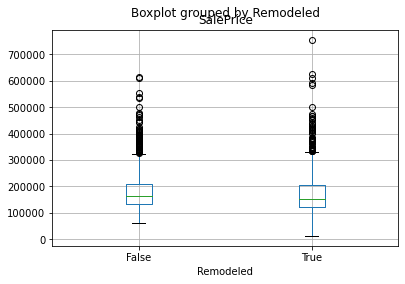

In [36]:
# Diagnostic
#Visualize the price differences
tdata.boxplot(column='SalePrice', by='Remodeled')

In [37]:
# Diagnostic
#Describing the remodel years for homes that have been remodeled.
tdata[tdata['Remodeled']==True].YearRemodAdd.describe()

count    1193.000000
mean     1986.029338
std        22.235884
min      1950.000000
25%      1958.000000
50%      1996.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

(0.0, 60.0)

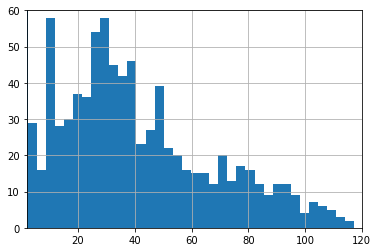

In [38]:
#Visualize what the column will be 
(tdata['YearRemodAdd'] - tdata['YearBuilt']).hist(bins=40)
plt.xlim(2,120)
plt.ylim(0, 60)

In [39]:
# Create Column 'RemodelYrsAftBuilt'
tdata['RemodelYrsAftBuilt'] = tdata['YearRemodAdd'] - tdata['YearBuilt']
tdata['RemodelYrsAftBuilt'].value_counts()
      

 0      1386
 1       352
 30       34
 40       29
 25       24
        ... 
 107       1
 109       1
 115       1
 121       1
-1         1
Name: RemodelYrsAftBuilt, Length: 116, dtype: int64

In [40]:
# See the new columns, show they look good.
tdata.iloc[:,-2:]

,Remodeled,RemodelYrsAftBuilt
0,True,11
1,False,0
2,True,77
3,True,103
4,False,0
...,...,...
2575,True,34
2576,False,0
2577,True,1
2578,False,0


In [41]:
# Removing original YearRemodAdd Column
tdata.drop('YearRemodAdd', axis=1, inplace=True)

 ## Functional - 3 Categories: Typ, Min, Maj(w/ mod, sal). Dummify

In [42]:
# Initial State
tdata['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [43]:
# Combine the Min1, Min2 into a Min category. Combine the Maj1, Maj2, Mod, and Sal into a Maj category
tdata['Functional'].replace(['Min1', 'Min2'], 'Min', inplace=True)
tdata['Functional'].replace(['Maj1', 'Maj2', 'Mod', 'Sal'], 'Maj', inplace=True)

In [44]:
# Check the result
tdata['Functional'].value_counts()

Typ    2399
Min     123
Maj      58
Name: Functional, dtype: int64

In [45]:
# Dummify the column, drop Typ (modal value)
Functional_dums = pd.get_dummies(tdata['Functional'], prefix='Functional', prefix_sep='_').drop('Functional_Typ',1)
tdata = pd.concat([tdata.drop('Functional', 1), Functional_dums], axis=1)

In [46]:
# Check the transformation
tdata.iloc[:,-2:].value_counts()

Functional_Maj  Functional_Min
0               0                 2399
                1                  123
1               0                   58
dtype: int64

## RoofStyle - Combine into Hip, Gabel, Other. Then Dummify.

In [47]:
# Initial State
tdata['RoofStyle'].value_counts()

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64

In [48]:
# Combine Gambrel, Flat, Mansard, and Shed into 'Other'
tdata['RoofStyle'].replace(['Gambrel', 'Flat', 'Mansard', 'Shed'], 'Other', inplace=True)

In [49]:
# Dummify, drop Gable (modal value)
RoofStyle_dums = pd.get_dummies(tdata['RoofStyle'], prefix='RoofStyle', prefix_sep='_').drop('RoofStyle_Gable',1)
tdata = pd.concat([tdata.drop('RoofStyle', axis=1), RoofStyle_dums], axis=1)

In [50]:
# Check the Transformation
tdata.iloc[:, -2:].value_counts()

RoofStyle_Hip  RoofStyle_Other
0              0                  2059
1              0                   473
0              1                    48
dtype: int64

## Exterior1st - Combine Categories into similar materials, then dummify.

Materials to combine:
Value, roughly, high to low.

No stone houses. 

Common brick is a significant upgrade, can't be combined. Not even sure what to combine it with based on value, its definitely the leader.

Vinyl Siding

Plywood - Better than hardboard, so should be its own category.

Wood shingles - its own category.

Stucco - Possibly similar enough to Cement Board (value-wise) to be combined with it.
Cement Board - Put w/ Wood siding, similar traits/value/looks, different materials.

Metal Siding - definitely its own category.

Cinderblock - Other, not used in a while (inferior to concrete)
Precast - Other (not different enough from other 'Other's to be significant)
Asphalt Shingles - Other (not different enough from other 'Other's to be significant)
Immitation Stucco - Other.

Hardboard - it's own category, cheapo finish.

Asbestos shingles means old, not used in last 50 years. (banned in the 70's) Maybe drop.

In [51]:
# Inital State
tdata['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [52]:
# Combine Stucco, Cement Board, and Wood siding (based on value). New cat called Stc_CemBd_WdSd
tdata['Exterior1st'].replace(['Stucco', 'CemntBd', 'Wd Sdng'], 'Stc_CemBd_WdSd', inplace=True)
# Combine Cinderblock, Precast, Asphalt Singles, Imitation Stucco into other.
tdata['Exterior1st'].replace(['CBlock', 'PreCast', 'AsphShn', 'ImStucc'], 'Other', inplace=True)

# Potentially drop asbestos shingles, no longer used (actually banned) and might be captured in age of house. 
# Or, conversely, might be a significant negative.

In [53]:
# Check the combinations
tdata['Exterior1st'].value_counts()

VinylSd           868
Stc_CemBd_WdSd    519
HdBoard           416
MetalSd           407
Plywood           194
BrkFace            80
WdShing            51
AsbShng            34
Other               6
BrkComm             5
Name: Exterior1st, dtype: int64

Still an aweful lot of categories. Maybe combine BrkComm with VinylSd and Plywood. (even though it is more valuable), and maybe combine Other with HdBoard (both low-value cats, even if different). Maybe combine wood shingles withCemBd_WdSd. Talk to team.

VinylSd, BrkComm, Plywood
HdBoard, Other
WdShing, Stc_CemBd_WdSd (Stucco, Cement Board, Wood Siding)

In [54]:
# Combine Wood shingles into Stc_CemBd_WdSd
tdata['Exterior1st'].replace(['Stc_CemBd_WdSd', 'WdShing'], 'Stc_CemBd_WdSdSh', inplace=True)
# Combine BrkComm with VinylSd, Plywood. 
tdata['Exterior1st'].replace(['BrkComm', 'VinylSd', 'Plywood'], 'VinylPlywBrkcom', inplace=True)
# Combine HdBoard and Other
tdata['Exterior1st'].replace(['Other', 'HdBoard'], 'HdbdOther', inplace=True)

In [55]:
tdata['Exterior1st'].value_counts()

VinylPlywBrkcom     1067
Stc_CemBd_WdSdSh     570
HdbdOther            422
MetalSd              407
BrkFace               80
AsbShng               34
Name: Exterior1st, dtype: int64

In [56]:
# Dummify, and drop VinylPlywBrkcom (modal) class
Exterior1st_dums = pd.get_dummies(tdata['Exterior1st'], prefix='Exterior1st', 
                                  prefix_sep='_').drop('Exterior1st_VinylPlywBrkcom', axis=1)
tdata = pd.concat([tdata.drop('Exterior1st', axis=1), Exterior1st_dums], axis=1)

In [57]:
# Check the Transformation
tdata.iloc[:, -5:].value_counts()

Exterior1st_AsbShng  Exterior1st_BrkFace  Exterior1st_HdbdOther  Exterior1st_MetalSd  Exterior1st_Stc_CemBd_WdSdSh
0                    0                    0                      0                    0                               1067
                                                                                      1                                570
                                          1                      0                    0                                422
                                          0                      1                    0                                407
                     1                    0                      0                    0                                 80
1                    0                    0                      0                    0                                 34
dtype: int64

## MasVnrType - Combine Bricks, Investigate Nulls, Dummify

In [58]:
# Initial state
print(tdata['MasVnrType'].value_counts())
print('Mising values: ', np.sum(tdata['MasVnrType'].isnull()))

None       1559
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64
Mising values:  14


In [59]:
tdata[tdata['MasVnrType'].isnull()].iloc[:,60:70] # Changed the column indees to investigate

,Remodeled,RemodelYrsAftBuilt,Functional_Maj,Functional_Min,RoofStyle_Hip,RoofStyle_Other,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_HdbdOther,Exterior1st_MetalSd
175,True,1,0,0,1,0,0,0,0,0
358,True,1,0,0,0,0,0,0,0,0
753,True,1,0,0,0,0,0,0,0,0
787,False,0,0,0,0,0,0,0,0,0
871,False,0,0,0,0,0,0,0,0,0
891,False,0,0,0,0,0,0,0,0,0
951,False,0,0,0,0,0,0,0,0,0
1041,False,0,0,0,0,0,0,0,0,0
1161,False,0,0,0,0,0,0,0,0,0
1355,False,0,0,0,0,0,0,0,0,0


From inspection, these null-values are in rows that:
1) Are of all different zoning types.
2) 1/3 have missing lot frontage
3) Most are 1Fam building types
4) Built in 2000 or later.
5) NaN for MasVnrArea
6) Foundations are all PConc
7) Most have paved drives and garages
8) All have NaN for Fence

Don't see any special relatinoships, and none have MasVnrArea, so going to fill these NaN's in as None (the mode)

In [60]:
# Filling in missing values with 'None'
tdata['MasVnrType'].fillna(value='None', inplace=True)

In [61]:
# Checking the transformation
print(tdata['MasVnrType'].value_counts())
print('Missing values: ', np.sum(tdata['MasVnrType'].isnull()))

None       1573
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64
Missing values:  0


In [62]:
# Combining Stone and BrkCmn, those are both much higher value than BrkFace.
tdata['MasVnrType'].replace(['Stone', 'BrkCmn'], 'StoneBrkcom', inplace=True)

In [63]:
# Checking the transformation
tdata['MasVnrType'].value_counts()

None           1573
BrkFace         804
StoneBrkcom     203
Name: MasVnrType, dtype: int64

In [64]:
# Create dummy columns
MasVnrType_dums = pd.get_dummies(tdata['MasVnrType'], prefix='MasVnrType', 
                                 prefix_sep='_').drop('MasVnrType_None', axis=1)
tdata = pd.concat([tdata.drop('MasVnrType', axis=1), MasVnrType_dums], axis=1)

In [65]:
tdata.iloc[:,-2:].value_counts()

MasVnrType_BrkFace  MasVnrType_StoneBrkcom
0                   0                         1573
1                   0                          804
0                   1                          203
dtype: int64

## MasVnrArea - Fill NaN's

Already found out that the NaN's in this column are the same as the ones in the MasVnrType column above. I filled those in with None for type so am filling these in with 0 for Area.

In [66]:
# Initial State
print(tdata['MasVnrArea'].value_counts())
print('Missing Values: ', np.sum(tdata['MasVnrArea'].isnull()))
#Numerical variable, with a large amount of Zeros.

0.0      1554
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64
Missing Values:  14


In [67]:
# Now filling the NaN's with zeros
tdata['MasVnrArea'].fillna(value=0, inplace=True)

In [68]:
# Check that our fills went correctly
print(tdata['MasVnrArea'].value_counts())
print('Missing Values: ', np.sum(tdata['MasVnrArea'].isnull()))

0.0      1568
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64
Missing Values:  0


## Foundation - Dummify
Maybe condense later. Potentially ask Mr. Burakowski

In [69]:
tdata['Foundation'].value_counts()

CBlock    1140
PConc     1105
BrkTil     278
Slab        42
Stone       10
Wood         5
Name: Foundation, dtype: int64

In [70]:
# Create dummy columns
Foundation_dums = pd.get_dummies(tdata['Foundation'], prefix='Foundation', 
                                 prefix_sep='_').drop('Foundation_CBlock', axis=1)
tdata = pd.concat([tdata.drop('Foundation', axis=1), Foundation_dums], axis=1)

In [71]:
# Check the dummification
tdata.iloc[:,-5:].value_counts()

Foundation_BrkTil  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood
0                  0                 0                0                 0                  1140
                   1                 0                0                 0                  1105
1                  0                 0                0                 0                   278
0                  0                 1                0                 0                    42
                                     0                1                 0                    10
                                                      0                 1                     5
dtype: int64

## BsmtQual - No Basement cat from NaN's, Combine 'Po' into 'Fa', Dummify

In [72]:
# Initial State
print(tdata['BsmtQual'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtQual'].isnull()))

TA    1166
Gd    1077
Ex     188
Fa      78
Po       2
Name: BsmtQual, dtype: int64
Missing values:  69


In [73]:
# Combine 'Po' into 'Fa'
tdata['BsmtQual'].replace('Po', 'Fa', inplace=True)
# Make 'None' category for NaN's
tdata['BsmtQual'].fillna(value='None', inplace=True)

In [74]:
# Check Transformation
print(tdata['BsmtQual'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtQual'].isnull()))

TA      1166
Gd      1077
Ex       188
Fa        80
None      69
Name: BsmtQual, dtype: int64
Missing values:  0


In [75]:
# Create dummy columns
BsmtQual_dums = pd.get_dummies(tdata['BsmtQual'], prefix='BsmtQual', 
                                 prefix_sep='_').drop('BsmtQual_TA', axis=1)
tdata = pd.concat([tdata.drop('BsmtQual', axis=1), BsmtQual_dums], axis=1)

In [76]:
# Check the dummification
tdata.iloc[:,-4:].value_counts()

BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None
0            0            0            0                1166
                          1            0                1077
1            0            0            0                 188
0            1            0            0                  80
             0            0            1                  69
dtype: int64

## BsmtCond - Combine 'Po' into 'Fa', 'Ex' into 'Gd'. Fill NaN's w/ 'None', the Dummify

In [77]:
# Initial State
print(tdata['BsmtCond'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtCond'].isnull()))

TA    2316
Gd     101
Fa      88
Po       3
Ex       3
Name: BsmtCond, dtype: int64
Missing values:  69


In [78]:
# Combine 'Po' into 'Fa', and 'Ex' into 'Gd'
tdata['BsmtCond'].replace('Po', 'Fa', inplace=True)
tdata['BsmtCond'].replace('Ex', 'Gd', inplace=True)
# Fill NaN's with 'None'
tdata['BsmtCond'].fillna(value='None', inplace=True)

In [79]:
# Checking the transformation
tdata['BsmtCond'].value_counts()

TA      2316
Gd       104
Fa        91
None      69
Name: BsmtCond, dtype: int64

In [80]:
# Create dummy columns
BsmtCond_dums = pd.get_dummies(tdata['BsmtCond'], prefix='BsmtCond', 
                                 prefix_sep='_').drop('BsmtCond_TA', axis=1)
tdata = pd.concat([tdata.drop('BsmtCond', axis=1), BsmtCond_dums], axis=1)

In [81]:
# Check the dummification
tdata.iloc[:,-3:].value_counts()

BsmtCond_Fa  BsmtCond_Gd  BsmtCond_None
0            0            0                2316
             1            0                 104
1            0            0                  91
0            0            1                  69
dtype: int64

## BsmtExposure - Create a binary y/n. 'Gd', 'Av' == 1, rest == 0

Need to figure out what the two NaN's are that are not similar to the rest of the basement column NaN's and decide what to do with them.

In [82]:
expose_df = tdata[tdata['BsmtExposure'].isnull()]
cond_df = data[data['BsmtCond'].isnull()]
#The rows not shared w/ other Bsmt Columns
expose_df[~expose_df.index.isin(cond_df.index)].iloc[:, 20:30] #changed the last columns indexes to visually inspect

,NoCentralAir,NonStdElectrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd
813,0,0,936,840,0.0,0.0,2,1,3,7
1201,0,0,1595,0,0.0,0.0,2,0,2,6


These both are unfinished basements in 1Fam houses, so I am going to the the BsmtExposure values to the modal value, 'No'

In [83]:
# Initial State
print(tdata['BsmtExposure'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtExposure'].isnull()))

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64
Missing values:  71


In [84]:
# Fill in the two unique NaN's with 'No'. Same for the rest of the NaN's.
tdata['BsmtExposure'].fillna(value='No', inplace=True)
# Combine Gd, Av into '1', combine Mn, No into '0'
tdata['BsmtExposure'].replace(['Gd', 'Av'], 1, inplace=True)
tdata['BsmtExposure'].replace(['Mn', 'No'], 0, inplace=True)

In [85]:
# Check Transformation
print(tdata['BsmtExposure'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtExposure'].isnull()))

0    1994
1     586
Name: BsmtExposure, dtype: int64
Missing values:  0


## BsmtFinType1 - Binarize, Good Living (y or n)

In [86]:
# Initial State
print(tdata['BsmtFinType1'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtFinType1'].isnull()))

GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    251
LwQ    139
Name: BsmtFinType1, dtype: int64
Missing values:  69


In [87]:
# Fill missing values with Unf (this is okay since I am dropping that class)
tdata['BsmtFinType1'].fillna(value='Unf', inplace=True)
# Change GLQ to 1, the rest to 0
tdata['BsmtFinType1'].replace(['Unf', 'ALQ', 'Rec', 'BLQ', 'LwQ'], 0, inplace=True)
tdata['BsmtFinType1'].replace(['GLQ'], 1, inplace=True)
# change name to reflect the new column meaning
tdata.rename(columns={'BsmtFinType1':'BsmtFinGdLvng'}, inplace=True)

In [88]:
# Check Transformation
tdata['BsmtFinGdLvng'].value_counts()

0    1827
1     753
Name: BsmtFinGdLvng, dtype: int64

# =====================
# GABBY'S CODE SECTION
# =====================

## BsmtUnfSF - Keep, change the 1 null to 0.

In [89]:
sum(tdata.BsmtUnfSF.isnull())
tdata[tdata.BsmtUnfSF.isnull()]
# Filling in missing value with 0
tdata['BsmtUnfSF'].fillna(value=0, inplace=True)

## TotalBsmtSF  - Keep, change the 1 null to 0.


In [90]:
sum(tdata.TotalBsmtSF.isnull())
tdata[tdata.TotalBsmtSF.isnull()] #classic row 912
# Filling in missing value with 0
tdata['TotalBsmtSF'].fillna(value=0, inplace=True)

## GarageType -
carport into none, built-in, basement into attached, two-type into detached (possibly binary Y/N)- none for nas


In [91]:
#nas to none as per kaggle dict
sum(tdata.GarageType.isnull())
tdata['GarageType'].fillna(value='None', inplace=True)
sum(tdata.GarageType.isnull())


0

In [92]:
tdata.GarageType.value_counts()

Attchd     1527
Detchd      716
BuiltIn     153
None        127
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64

In [93]:
#whittle categories
tdata.GarageType[tdata.GarageType=="CarPort"]='None'
tdata.GarageType[tdata.GarageType=="BuiltIn"]='Attchd'
tdata.GarageType[tdata.GarageType=="Basment"]='Attchd'
tdata.GarageType[tdata.GarageType=="2Types"]='Detchd'
tdata.GarageType.value_counts()

<ipython-input-93-4d8f79e8676c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="CarPort"]='None'
<ipython-input-93-4d8f79e8676c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="BuiltIn"]='Attchd'
<ipython-input-93-4d8f79e8676c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="Basment"]='Attchd'
<ipython-input-93-4d8f79e8676c>:5

Attchd    1707
Detchd     737
None       136
Name: GarageType, dtype: int64

In [94]:
#as discovered during garagefinish,there are nine nas that would suggest no garage hpwever they have garage data in all other garage cols so assigning them attched aka the mode
sum( (tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')) 
tdata['GarageType'][(tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')]='Attchd'
sum( (tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')) 
tdata.GarageType=tdata.GarageType.astype("category")

<ipython-input-94-ffd15f8ee67a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageType'][(tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')]='Attchd'


In [95]:
# Dummifying, dropping attchd column.
GarageTypedummy = pd.get_dummies(tdata['GarageType'], prefix='GarageType', prefix_sep='_').drop('GarageType_Attchd',1)
tdata = pd.concat([tdata, GarageTypedummy], axis=1)


In [96]:
tdata

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,GarageType_Detchd,GarageType_None
0,909176150,856,126000,30,7890,Reg,Lvl,Corner,SWISU,Norm,...,0,0,0,0,0,0,0,0,1,0
1,905476230,1049,139500,120,4235,Reg,Lvl,Inside,Edwards,Norm,...,0,0,0,1,0,0,0,0,0,0
2,911128020,1001,124900,30,6060,Reg,Lvl,Inside,IDOTRR,Norm,...,0,0,0,0,0,0,0,0,1,0
3,535377150,1039,114000,70,8146,Reg,Lvl,Corner,OldTown,Norm,...,0,0,1,0,0,0,0,0,1,0
4,534177230,1665,227000,60,8400,Reg,Lvl,Inside,NWAmes,Norm,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,8854,Reg,Lvl,Inside,BrkSide,Norm,...,0,0,0,0,0,0,0,0,1,0
2576,905402060,1733,139600,20,13680,IR1,Lvl,CulDSac,Edwards,Norm,...,0,0,0,0,1,0,0,1,0,0
2577,909275030,2002,145000,90,6270,Reg,HLS,Inside,Crawfor,Norm,...,0,0,0,0,0,0,0,0,1,0
2578,907192040,1842,217500,60,8826,Reg,Lvl,Inside,CollgCr,Norm,...,0,0,0,1,0,0,0,0,0,0


## HasGarage -create binary garage col- 1=yes garage

In [97]:
#tdata['HasGarage'] = np.where(tdata['GarageType']!= 'None', 1, 0)

In [98]:
#check its worked
#sum(tdata['HasGarage']==0)

## GarageFinish

In [99]:
tdata['GarageFinish'].value_counts()
sum(tdata['GarageFinish'].isna())
#sum( (tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')) 

129

In [100]:
tdata.GarageFinish[(tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')]='Unf'

<ipython-input-100-ae0553da1aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageFinish[(tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')]='Unf'


In [101]:
tdata['GarageFinish'].value_counts()

Unf    1114
RFn     718
Fin     621
Name: GarageFinish, dtype: int64

In [102]:
tdata['GarageFinish'][(tdata['GarageFinish'].isna())]='None'
tdata['GarageFinish'].value_counts()
tdata.GarageFinish=tdata.GarageFinish.astype("category")
GarageFinishdummy = pd.get_dummies(tdata['GarageFinish'], prefix='GarageFinish', prefix_sep='_').drop('GarageFinish_Unf',1)
tdata = pd.concat([tdata, GarageFinishdummy], axis=1)

<ipython-input-102-058c3fab6866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageFinish'][(tdata['GarageFinish'].isna())]='None'


## GarageCars- keep as is

In [103]:
sum(tdata['GarageCars'].isna())

1

In [104]:
tdata['GarageFinish'][tdata['GarageCars'].isna()]
#one na which has features for garage type so we gonna give it the avrg number of cars 
tdata['GarageCars'][tdata['GarageCars'].isna()]=round(tdata['GarageCars'].mean())

<ipython-input-104-c5fc05e22339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageCars'][tdata['GarageCars'].isna()]=round(tdata['GarageCars'].mean())


In [105]:
sum(tdata['GarageCars'].isna())

0

## GarageArea - if missing-> replace w mean of those w garages else 0 if no garage duh 

In [106]:
sum( (tdata['GarageArea'].isna()) &(tdata['GarageType']!='None'))
sum( (tdata['GarageArea']==0) &(tdata['GarageType']!='None'))
sum( (tdata['GarageArea']!=0) &(tdata['GarageType']=='None'))

0

In [107]:
#one w a garage but no area 
tdata['GarageArea'][(tdata['GarageArea'].isna()) &(tdata['GarageType']!='None')]=round(tdata['GarageArea'][tdata['GarageArea']!=0].mean())

<ipython-input-107-0f7f5f9bc4cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageArea'][(tdata['GarageArea'].isna()) &(tdata['GarageType']!='None')]=round(tdata['GarageArea'][tdata['GarageArea']!=0].mean())


In [108]:
sum(tdata['GarageArea'].isna())

0

## PavedDrive - binary, y=0 n=1 as per drop maj class- follow up w luke

In [109]:
sum(tdata['PavedDrive'].isna())

0

In [110]:
#tdata[tdata['PavedDrive']=="Y"]
tdata['UnpavedDrive'] = np.where(tdata['PavedDrive']!= 'Y', 1, 0)

In [111]:
tdata=tdata.drop('PavedDrive',1)

In [112]:
#tdata.PavedDrive

## WoodDeckSF - binarize

In [113]:
sum(tdata['WoodDeckSF'].isna())
sum(tdata['WoodDeckSF']>0)
tdata['WoodDeckBinary']=tdata['WoodDeckSF']>0
tdata=tdata.drop('WoodDeckSF',1)

In [114]:
#tdata.WoodDeckSF

## Create Has Porch


In [115]:
tdata['HasPorch']=((tdata['ScreenPorch']+tdata['OpenPorchSF']+tdata['3SsnPorch']+tdata['EnclosedPorch'])>0).astype(int)


In [116]:
tdata=tdata.drop('ScreenPorch',1)
tdata=tdata.drop('OpenPorchSF',1)
tdata=tdata.drop('3SsnPorch',1)
tdata=tdata.drop('EnclosedPorch',1)

## Fence- Binarize

In [117]:
sum(tdata.Fence.isna())

2055

In [118]:
tdata['Fence'][tdata['Fence'].isna()]='None'

<ipython-input-118-59ec50b9ce32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['Fence'][tdata['Fence'].isna()]='None'


In [119]:
tdata['FenceBinary']=(tdata['Fence']!='None').astype(int)


In [120]:
sum(tdata['FenceBinary']==0)

2055

In [121]:
tdata=tdata.drop('Fence',1)

## MoSold

In [122]:
sum(tdata.MoSold.isna())

0

In [123]:
tdata.MoSold=tdata.MoSold.astype("category")

## OverallQual

In [124]:
sum(tdata.OverallQual.isna())

0

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

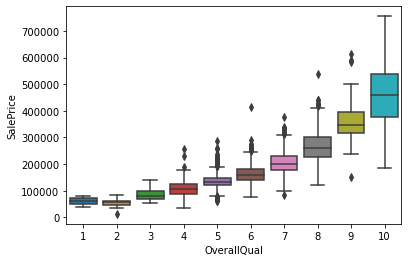

In [125]:
sns.boxplot(x='OverallQual',y='SalePrice',data=tdata)

<AxesSubplot:xlabel='OverallQual', ylabel='OverallCond'>

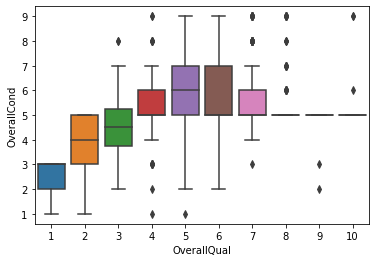

In [126]:
sns.boxplot(x='OverallQual',y='OverallCond',data=tdata)

## OverallCond- 
-said we should binarize but going to do that in new col bc i actually like this as is now ...
-do we think this should be ordinal or nominal categorical? 

In [127]:
sum(tdata.OverallCond.isna())

0

In [128]:
tdata.OverallCond.value_counts()

5    1402
6     498
7     360
8     140
4      88
9      41
3      39
2       8
1       4
Name: OverallCond, dtype: int64

(array([   4.,    8.,   39.,   88.,    0., 1402.,  498.,  360.,  140.,
          41.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

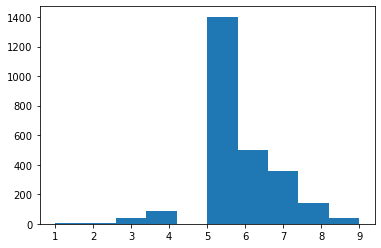

In [129]:
plt.hist(tdata.OverallCond)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

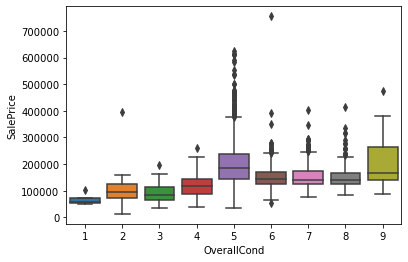

In [130]:
sns.boxplot(x='OverallCond',y='SalePrice',data=tdata)

## OverallCondBinary
-below average y or no 

In [131]:
tdata['OverallCondBinary']=(tdata['OverallCond']<5).astype(int)
tdata=tdata.drop('OverallCond',1)

## GeoRefNo

In [132]:
sum(tdata.GeoRefNo.isna())

21

In [133]:
#nothing I can do about these nas rn- will become an issue for computing distance
#to college. at that time we can impute the avrg distance or since small # instances do manually if
#they have an address

#themissing21 = indices of these rows  in case want to drop 

## Prop_Addr

In [134]:
sum((tdata.Prop_Addr.isna()))#&(tdata.GeoRefNo.isna()))
#same 21 w no address- nothing can do bout that 


21

## SchD_S
-binary- 1 means school dist 5 else dist 1

In [135]:
sum((tdata.SchD_S.isna()) &(tdata.GeoRefNo.isna()))
#same 21 w no address- impute mode

21

In [136]:
tdata.SchD_S.value_counts()

1.0    2229
5.0     330
Name: SchD_S, dtype: int64

In [137]:
tdata.SchD_S[tdata.SchD_S.isna()]=1.0

<ipython-input-137-6fb3b8e8450f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.SchD_S[tdata.SchD_S.isna()]=1.0


In [138]:
tdata['SchD_S'] = np.where(tdata['SchD_S']== 5.0, 1, 0)

In [139]:
sum(tdata['SchD_S']==1)

330

## TxD_S 
-this is perfectly corr w school dist- drop 

In [140]:
sum((tdata.TxD_S.isna()))

21

In [141]:
tdata.TxD_S.value_counts()

1.0     2229
45.0     330
Name: TxD_S, dtype: int64

In [142]:
tdata.TxD_S[tdata.TxD_S.isna()]=1.0
tdata['TxD_S'] = np.where(tdata['TxD_S']== 45.0, 1, 0)

<ipython-input-142-c4b4d3829437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.TxD_S[tdata.TxD_S.isna()]=1.0


In [143]:
tdata=tdata.drop(columns='TxD_S')

## LndAc_S
-thinking bout filling in the nas and zeros with the avrg land ac size for the given lot area cause theyre roughly corr and rando avrg might not make sense
-hypothesize we will see some correlations in cols 

In [144]:
sum((tdata.LndAc_S.isna()) )

21

In [145]:
themissing21=tdata.index[(tdata.LndAc_S.isna())].tolist()

In [146]:
tdata[tdata.LndAc_S==0]

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,UnpavedDrive,WoodDeckBinary,HasPorch,FenceBinary,OverallCondBinary
904,910206010,845,68104,50,11067,Reg,Lvl,Corner,IDOTRR,Norm,...,1,0,0,0,0,1,True,0,0,1


In [147]:
tdata.LndAc_S.value_counts()

44000.0     13
43700.0     12
36800.0     12
41700.0     12
40200.0     12
            ..
100400.0     1
80300.0      1
68900.0      1
123300.0     1
87700.0      1
Name: LndAc_S, Length: 772, dtype: int64

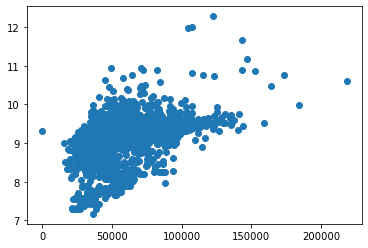

In [148]:
plt.scatter(tdata['LndAc_S'], np.log(tdata['LotArea']))
#vis corr w lot area 

In [149]:
#tdata.LndAc_S[tdata.LndAc_S==0]=tdata.LotArea[tdata.LotArea==]
LA=int(tdata[tdata.LndAc_S==0].LotArea)
tdata.LndAc_S[tdata.LndAc_S==0]=round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean()
)

<ipython-input-149-d0741030846e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.LndAc_S[tdata.LndAc_S==0]=round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean()


In [150]:
list((tdata.LotArea[((tdata.LndAc_S.isna()))]).keys())

[79,
 109,
 404,
 495,
 558,
 680,
 683,
 895,
 1088,
 1204,
 1346,
 1516,
 1578,
 2011,
 2139,
 2168,
 2203,
 2228,
 2323,
 2525,
 2531]

In [151]:
imputedvals=[]
keysofnas=list((tdata.LotArea[((tdata.LndAc_S.isna()))]).keys())
for i in range(sum(tdata.LndAc_S.isna())):
    LA=tdata.loc[keysofnas[i],'LotArea']
    imputedvals.append(round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean())
    )  

In [152]:
tdata.LndAc_S[((tdata.LndAc_S.isna()))]=imputedvals

<ipython-input-152-90775d9f79f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.LndAc_S[((tdata.LndAc_S.isna()))]=imputedvals


In [153]:
tdata.loc[109,'LndAc_S']

54033.0

## OthAc_S
-we need to drop either this or lndac_s asap due to corr- didnt even need a test just visually 


In [154]:
sum((tdata.OthAc_S.isna()) )

21

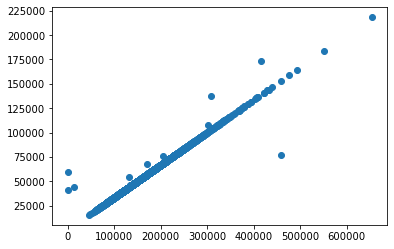

In [155]:
plt.scatter(tdata['OthAc_S'], (tdata['LndAc_S']))

In [156]:
tdata=tdata.drop(columns='OthAc_S')

In [157]:
#Dropping columns that weren't earlier because they were needed for more code later. Done with them now.
tdata=tdata.drop(columns='GarageType')
tdata=tdata.drop(columns='GarageFinish')


# ============
# JUDE'S CODE
# ============

## Columns

#### GrLivArea - keep as is
#### MSSubClass - combine into 1stry, 1plus_stry, multi then dummify
#### LotFrontage - drop
#### LotArea - keep as is
#### LotShape - binarize
#### LandContour - binarize into "level" and "other"
#### LotConfig - combine into "culdesac",  "inside", "corner"
#### Neighborhood - keep as is
#### Condition1 - cat into "Normal", "Feedr", "Artery", "Railroad", "Positive" then dummify
#### BldgType - combine 2fam conv and duplex then dummify

### MSSubClass

In [158]:
# Initial State

tdata['MSSubClass'].value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

In [159]:
# Transform Data

tdata['MSSubClass'].replace([20, 30, 40, 80, 85, 120], 'one_story', inplace=True)
tdata['MSSubClass'].replace([45, 50, 60, 70, 75, 150, 160, 180], '>1-story', inplace=True)
tdata['MSSubClass'].replace([90, 190], 'multi_fam', inplace=True)

In [160]:
# Check Transformation

tdata['MSSubClass'].value_counts()

one_story    1389
>1-story     1051
multi_fam     140
Name: MSSubClass, dtype: int64

In [161]:
pd.get_dummies(tdata['MSSubClass'])

,>1-story,multi_fam,one_story
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
2575,0,0,1
2576,0,0,1
2577,0,1,0
2578,1,0,0


In [162]:
# Dummify, drop 'one_stry'

MSSubClass_dums = pd.get_dummies(tdata['MSSubClass'], prefix='MSSubClass', prefix_sep='_').drop('MSSubClass_one_story', 1)
tdata = pd.concat([tdata.drop('MSSubClass', 1), MSSubClass_dums], axis=1)

In [163]:
# Check new column

tdata.iloc[:,-2:].value_counts()

MSSubClass_>1-story  MSSubClass_multi_fam
0                    0                       1389
1                    0                       1051
0                    1                        140
dtype: int64

### LotFrontage (DROPPED)

### LotShape

In [164]:
# Initial State

tdata['LotShape'].value_counts()

Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

In [165]:
# Transform Data

tdata['LotShape'].replace(['IR1', 'IR2', 'IR3'], 'IR', inplace=True)

In [166]:
# Check Transformation

tdata['LotShape'].value_counts()

Reg    1641
IR      939
Name: LotShape, dtype: int64

In [167]:
# Dummify, drop 'Reg'

LotShape_dums = pd.get_dummies(tdata['LotShape'], prefix='LotShape', prefix_sep='_').drop('LotShape_Reg', 1)
tdata = pd.concat([tdata.drop('LotShape', 1), LotShape_dums], axis=1)

In [168]:
# Check new column
tdata.iloc[:,-1:].value_counts()

LotShape_IR
0              1641
1               939
dtype: int64

### LandContour

In [169]:
# Initial State

tdata['LandContour'].value_counts()

Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64

In [170]:
# Transform Data

tdata['LandContour'].replace(['HLS', 'Bnk', 'Low'], 'slope', inplace=True)

In [171]:
# Check Transformation

tdata['LandContour'].value_counts()

Lvl      2337
slope     243
Name: LandContour, dtype: int64

In [172]:
# Dummify, drop 'Lvl'

LandContour_dums = pd.get_dummies(tdata['LandContour'], prefix='LandContour', prefix_sep='_').drop("LandContour_Lvl", 1)
tdata = pd.concat([tdata.drop('LandContour', 1), LandContour_dums], axis=1)

In [173]:
tdata.rename(columns={'LandContour_slope':'SlopedLot'}, inplace=True)
tdata.iloc[:,-1:].value_counts()

SlopedLot
0            2337
1             243
dtype: int64

### LotConfig

In [174]:
# Initial State

tdata['LotConfig'].value_counts()

Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

In [175]:
# Transform Data

tdata['LotConfig'].replace(['FR2', 'FR3'], 'Corner', inplace=True)

In [176]:
# Check Transformation

tdata['LotConfig'].value_counts()

Inside     1886
Corner      530
CulDSac     164
Name: LotConfig, dtype: int64

In [177]:
# Dummify, drop 'Inside'

LotConfig_dums = pd.get_dummies(tdata['LotConfig'], prefix='LotConfig', prefix_sep='_').drop('LotConfig_Inside', 1)
tdata = pd.concat([tdata.drop('LotConfig', 1), LotConfig_dums], axis=1)

In [178]:
tdata.iloc[:,-2:].value_counts()

LotConfig_Corner  LotConfig_CulDSac
0                 0                    1886
1                 0                     530
0                 1                     164
dtype: int64

### Condition1

In [179]:
# Initial State

tdata['Condition1'].value_counts()

Norm      2228
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: Condition1, dtype: int64

In [180]:
# Transform Data

tdata['Condition1'].replace(['RRAn', 'RRAe', 'RRNe', 'RRNn'], 'RailRd', inplace=True)
tdata['Condition1'].replace(['PosN', 'PosA'], 'Pos', inplace=True)

In [181]:
# Check Transformation

tdata['Condition1'].value_counts()

Norm      2228
Feedr      137
Artery      81
RailRd      78
Pos         56
Name: Condition1, dtype: int64

In [182]:
# Dummify, drop 'Norm'

Condition1_dums = pd.get_dummies(tdata['Condition1'], prefix='Condition1', prefix_sep='_').drop('Condition1_Norm', 1)
tdata = pd.concat([tdata.drop('Condition1', 1), Condition1_dums], axis=1)

In [183]:
tdata.iloc[:,-4:].value_counts()

Condition1_Artery  Condition1_Feedr  Condition1_Pos  Condition1_RailRd
0                  0                 0               0                    2228
                   1                 0               0                     137
1                  0                 0               0                      81
0                  0                 0               1                      78
                                     1               0                      56
dtype: int64

### BldgType

In [184]:
# Initial State

tdata['BldgType'].value_counts()

1Fam      2139
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

In [185]:
# Transform Data

tdata['BldgType'].replace(['Duplex', '2fmCon'], '2Fam', inplace=True)

In [186]:
# Check Transformation

tdata['BldgType'].value_counts()

1Fam      2139
TwnhsE     202
2Fam       141
Twnhs       98
Name: BldgType, dtype: int64

In [187]:
# Dummify, drop '1Fam'

BldgType_dums = pd.get_dummies(tdata['BldgType'], prefix='BldgType', prefix_sep='_').drop('BldgType_1Fam', 1)
tdata = pd.concat([tdata.drop('BldgType', 1), BldgType_dums], axis=1)

In [188]:
tdata.iloc[:,-3:].value_counts()

BldgType_2Fam  BldgType_Twnhs  BldgType_TwnhsE
0              0               0                  2139
                               1                   202
1              0               0                   141
0              1               0                    98
dtype: int64

# ============================
# FINISHED COLUMN PROCESSING
# ============================
The rest of the code below is to check out the columns we are left with now and to save a new dataset.

In [189]:
tdata

,PID,GrLivArea,SalePrice,LotArea,Neighborhood,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,...,SlopedLot,LotConfig_Corner,LotConfig_CulDSac,Condition1_Artery,Condition1_Feedr,Condition1_Pos,Condition1_RailRd,BldgType_2Fam,BldgType_Twnhs,BldgType_TwnhsE
0,909176150,856,126000,7890,SWISU,6,1939,0.0,TA,0,...,0,1,0,0,0,0,0,0,0,0
1,905476230,1049,139500,4235,Edwards,5,1984,149.0,Gd,0,...,0,0,0,0,0,0,0,0,0,1
2,911128020,1001,124900,6060,IDOTRR,5,1930,0.0,Gd,0,...,0,0,0,0,0,0,0,0,0,0
3,535377150,1039,114000,8146,OldTown,4,1900,0.0,Gd,0,...,0,1,0,0,0,0,0,0,0,0
4,534177230,1665,227000,8400,NWAmes,8,2001,0.0,Gd,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,8854,BrkSide,6,1916,0.0,TA,0,...,0,0,0,0,0,0,0,0,0,0
2576,905402060,1733,139600,13680,Edwards,3,1955,0.0,TA,0,...,0,0,1,0,0,0,0,0,0,0
2577,909275030,2002,145000,6270,Crawfor,5,1949,0.0,TA,0,...,1,0,0,0,0,0,0,1,0,0
2578,907192040,1842,217500,8826,CollgCr,7,2000,144.0,Gd,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
#The below shows columns that have the most 0's, or highest sparsity of data.
np.sum(~tdata.astype(bool), axis=0).sort_values(ascending=False)[0:60]


Foundation_Wood                 2575
Foundation_Stone                2570
Exterior1st_AsbShng             2546
Foundation_Slab                 2538
RoofStyle_Other                 2532
Condition1_Pos                  2524
Functional_Maj                  2522
KitchenQual_Fa                  2517
BsmtQual_None                   2511
BsmtCond_None                   2511
Condition1_RailRd               2502
BsmtQual_Fa                     2500
Exterior1st_BrkFace             2500
Condition1_Artery               2499
HeatingQC_Fa                    2495
BsmtCond_Fa                     2489
BldgType_Twnhs                  2482
BsmtCond_Gd                     2476
Functional_Min                  2457
GarageFinish_None               2453
GarageType_None                 2453
Condition1_Feedr                2443
OverallCondBinary               2441
MSSubClass_multi_fam            2440
BldgType_2Fam                   2439
KitchenQual_Ex                  2438
BsmtHalfBath                    2422
N

In [191]:
#Need to come up with a reasonable order for columns. And figure out which are telling ust he same things.
tdata.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'LotArea', 'Neighborhood',
       'OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtExposure',
       'BsmtFinGdLvng', 'BsmtUnfSF', 'TotalBsmtSF', 'NoCentralAir',
       'NonStdElectrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'MoSold',
       'GeoRefNo', 'Prop_Addr', 'SchD_S', 'LndAc_S', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'Remodeled', 'RemodelYrsAftBuilt', 'Functional_Maj',
       'Functional_Min', 'RoofStyle_Hip', 'RoofStyle_Other',
       'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'Exterior1st_HdbdOther',
       'Exterior1st_MetalSd', 'Exterior1st_Stc_CemBd_WdSdSh',
       'MasVnrType_BrkFace', 'MasVnrType_StoneBrkcom', 'Foundation_BrkTil',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
  

Proposed Ordering:

**First the dependent variable**
'SalePrice'
**Next all the things not machine-learning related, to make them easy to identify and drop**
'PID'
'MoSold'
'GeoRefNo'
'Prop_Addr'
**Everything to do with the size of the house**
'GrLivArea'
'1stFlrSF'
'2ndFlrSF'
'TotRmsAbvGrd'
'BedroomAbvGr'
'FullBath'
'HalfBath'
'MSSubClass_one_plus_stry'
'MSSubClass_multi_stry'
'BldgType_Twnhs'
'BldgType_TwnhsE'
'BldgType_2Fam'
**Everything to do with the lot**
'LotArea'
'LndAc_S'
'LotShape_IR'
'LandContour_slope'
'LotConfig_Corner'
'LotConfig_CulDSac'
'Condition1_Artery'
'Condition1_Feedr'
'Condition1_Pos'
'Condition1_RailRd'
**Everything to do with the building materials of the house**
'NonStdElectrical'
'MasVnrArea'
'MasVnrType_BrkFace'
'MasVnrType_StoneBrkcom'
'RoofStyle_Hip'
'RoofStyle_Other'
'Exterior1st_AsbShng'
'Exterior1st_BrkFace'
'Exterior1st_HdbdOther'
'Exterior1st_MetalSd'
'Exterior1st_Stc_CemBd_WdSdSh'
'Foundation_BrkTil'
'Foundation_PConc'
'Foundation_Slab'
'Foundation_Stone'
'Foundation_Wood'
**Everything to do with the quality of the house**
'YearBuilt'
'OverallQual'
'OverallCondBinary'
'ExterQual'
'HeatingQC_Gd'
'HeatingQC_TA'
'HeatingQC_Fa'
'KitchenQual_Ex'
'KitchenQual_Gd'
'KitchenQual_Fa'
'Remodeled'
'RemodelYrsAftBuilt'
'Functional_Min'
'Functional_Maj'
'FireplaceQu'
**Everything to do with the Basement**
'BsmtQual_None'
'BsmtCond_None'
'TotalBsmtSF'
'BsmtUnfSF'
'BsmtFinGdLvng'
'BsmtHalfBath'
'BsmtFullBath'
'BsmtExposure'
'BsmtQual_Ex'
'BsmtQual_Gd'
'BsmtQual_Fa'
'BsmtCond_Gd'
'BsmtCond_Fa'
**Everything to do with Garages**
'GarageType_Detchd'
'GarageType_None'
'GarageFinish_None'
'GarageArea'
'GarageCars'
'GarageFinish_Fin'
'GarageFinish_RFn'
**Information on 'amenities'**
'Neighborhood'
'UnpavedDrive'
'WoodDeckBinary'
'HasPorch'
'FenceBinary'
'Fireplaces'
'NoCentralAir'
'SchD_S'


NOTE: This will have to be edited and tweaked as we go on.

In [192]:
ordered_col_list = ['SalePrice', #dependent Variable
                   'PID', 'Prop_Addr', 'GeoRefNo', 'MoSold', #Not ML-related
                   'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                    'FullBath', 'HalfBath', 'MSSubClass_>1-story', 'MSSubClass_multi_fam', 
                    'BldgType_Twnhs', 'BldgType_TwnhsE', 'BldgType_2Fam', #Size of the house
                    'LotArea', 'LndAc_S', 'LotShape_IR', 'SlopedLot', 'LotConfig_Corner', 
                    'LotConfig_CulDSac', 'Condition1_Artery', 'Condition1_Feedr', 
                    'Condition1_Pos', 'Condition1_RailRd', #Lot columns
                    'NonStdElectrical', 'MasVnrArea', 'MasVnrType_BrkFace', 'MasVnrType_StoneBrkcom', 
                    'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 
                    'Exterior1st_HdbdOther', 'Exterior1st_MetalSd', 'Exterior1st_Stc_CemBd_WdSdSh', 
                    'Foundation_BrkTil', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 
                    'Foundation_Wood', # Building Materials
                   'YearBuilt', 'OverallQual', 'OverallCondBinary', 'ExterQual', 'HeatingQC_Gd', 
                    'HeatingQC_TA', 'HeatingQC_Fa', 'KitchenQual_Ex', 'KitchenQual_Gd', 
                    'KitchenQual_Fa', 'Remodeled', 'RemodelYrsAftBuilt', 'Functional_Min', 
                    'Functional_Maj', 'FireplaceQu', #Quality of house
                   'BsmtQual_None', 'BsmtCond_None', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinGdLvng', 
                    'BsmtHalfBath', 'BsmtFullBath', 'BsmtExposure', 'BsmtQual_Ex', 'BsmtQual_Gd', 
                    'BsmtQual_Fa', 'BsmtCond_Gd', 'BsmtCond_Fa', #Basement columns
                   'GarageType_Detchd', 'GarageType_None', 'GarageFinish_None', 'GarageArea', 
                    'GarageCars', 'GarageFinish_Fin', 'GarageFinish_RFn', # Garage Columns
                   'Neighborhood', 'UnpavedDrive', 'WoodDeckBinary', 'HasPorch', 'FenceBinary', 
                    'Fireplaces', 'NoCentralAir', 'SchD_S'] # Amenity Columns






In [193]:
tdata = tdata[ordered_col_list]

In [266]:
 tdata_train, tdata_test = train_test_split(tdata, test_size=0.33, random_state=100)

In [267]:
#ensuring all boolean cols are evenly distributed

fullsetvalues=np.sum(~tdata.astype(bool), axis=0)
trainsetvalues=np.sum(~tdata_train.astype(bool), axis=0)


In [268]:
#none of the sparse bool cols have abnoraml dist btw test and train. 
#should have ~66% of bools cols weight in the train anything above 70 or below 60 is shown
#only problamtic cols are not bools and this just says 75% houses w no above ground bedrooms are in this set and same logic w fullbath
((trainsetvalues/fullsetvalues ).sort_values(ascending=False))[(((trainsetvalues/fullsetvalues ).sort_values(ascending=False))>.7) | (((trainsetvalues/fullsetvalues ).sort_values(ascending=False))<.6)]

BedroomAbvGr    0.857143
FullBath        0.750000
dtype: float64

In [195]:
tdata_train.to_csv(r'initial_dummied_data_TRAIN.csv', index=False)

In [ ]:
tdata_test.to_csv(r'initial_dummied_data_TEST.csv', index=False)